In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
car = pd.read_csv("./car+evaluation/car.data", header=None)
car.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
car.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   object
 1   Maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   LugBoot     1728 non-null   object
 5   Safety      1728 non-null   object
 6   Evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
car.Buying.replace(('vhigh', 'high', 'med', 'low'), (1, 2, 3, 4), inplace=True)
car.Maint.replace(('vhigh', 'high', 'med', 'low'), (1,2,3,4), inplace=True)
car.Doors.replace(('2', '3', '4', '5more'), (1,2,3,4), inplace=True)
car.Persons.replace(('2', '4', 'more'), (1,2,3), inplace=True)
car.LugBoot.replace(('small', 'med', 'big'), (1, 2, 3), inplace=True)
car.Safety.replace(('low', 'med', 'high'), (1,2,3), inplace=True)
car.Evaluation.replace(('unacc', 'acc', 'good', 'vgood'), (1,2,3,4), inplace=True)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Buying      1728 non-null   int64
 1   Maint       1728 non-null   int64
 2   Doors       1728 non-null   int64
 3   Persons     1728 non-null   int64
 4   LugBoot     1728 non-null   int64
 5   Safety      1728 non-null   int64
 6   Evaluation  1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [7]:
display(car)

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,3
1724,4,4,4,3,2,3,4
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,3


In [8]:
car.describe()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


In [9]:
#Checking whether the dataset contains any null values
print(car.isna().values.any())
print(car.isnull().values.any())

False
False


In [10]:
correlation_matrix = car.corr()
correlation_matrix["Evaluation"]

Buying        0.282750
Maint         0.232422
Doors         0.066057
Persons       0.341707
LugBoot       0.157932
Safety        0.439337
Evaluation    1.000000
Name: Evaluation, dtype: float64

In [11]:
#Separating the Independent and the Dependent Variables
X = car.drop("Evaluation", axis=1)
X = X.values
y = car["Evaluation"]
y = y.values

In [12]:
#Creating an numpy array for the data points obtained from the correlation matrix
new_data_point = np.array([
    0.282750,
    0.232422,
    0.066057,
    0.341707,
    0.157932,
    0.439337,
])

In [13]:
#Calculating the Distance between the new datapoint and the each of the datapoints in the zoo dataset
#the length of the vector is called the norm. The norm is a positive value that indicates the magnitude of the vector.
distances = np.linalg.norm(X - new_data_point, axis =1) #This will give the vector of distances

In [16]:
#Keeping the Number of neighbors to be 6 (k = 6)
#We are going to sort the distances from lowest to highest using argsort

k = 6
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids #These siz neighbors are closer to the target variable

array([  0,   1,   9, 432, 108,   3], dtype=int64)

In [17]:
#Combining those neighbors for prediction
#finding the ground truth
nearest_neighbor_type = y[nearest_neighbor_ids]
nearest_neighbor_type

array([1, 1, 1, 1, 1, 1], dtype=int64)

Prediction

Mean for Regression

In [18]:
#Prediction - Regression
prediction = nearest_neighbor_type.mean()
prediction # This means that the 6-Nearest Neighbor prediction for the new data point is the value we get

1.0

Mode for Classification

In [20]:
#To calculate Mode

def calculate_Mode(arr):
    count={}
    max_count=0
    mode=None

    for i in arr:
        if i in count:
            count[i] +=1
        else:
            count[i] = 1
        if count[i]>max_count:
            max_count = count[i]
            mode = i
    
    return mode

class_neighbors = np.array(car['Evaluation'])
mode_value_regul = calculate_Mode(class_neighbors)
print("Mode: ", mode_value_regul)

Mode:  1


Fitting the KNN Model

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

In [22]:
#For Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model_regression = KNeighborsRegressor(n_neighbors=6) #This is the Value of K
knn_model_regression.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [24]:
#For Classification
from sklearn.neighbors import KNeighborsClassifier
knn_model_classification = KNeighborsClassifier(n_neighbors=6)
knn_model_classification.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Evaluating the Model - Regression

In [25]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_pred_regression = knn_model_regression.predict(X_test)
mae_regression = mean_absolute_error(y_test, y_pred_regression)
print("Mean Absolute Error (MAE): ", mae_regression)

Mean Absolute Error (MAE):  0.2013487475915222


In [26]:
#Root Mean Square Error (RMSE)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model_regression.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print("RMSE on Train Data: ",rmse_train)

mse_test = mean_squared_error(y_test, y_pred_regression)
rmse_test = sqrt(mse_test)
print("RMSE on Test Data: ", rmse_test)

RMSE on Train Data:  0.2515004143411075
RMSE on Test Data:  0.3214816639979277


In [27]:
#R-Squared (R2) Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_regression)
print("R-Squared (R2) Score: ", r2)

R-Squared (R2) Score:  0.8188512127088241


Evaluating the Model - Classification

In [28]:
#Accuracy Score
from sklearn.metrics import accuracy_score
y_pred_classification = knn_model_classification.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_classification)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.9113680154142582


In [29]:
#Confusion Matrix - For Evaluating Class-Wise Performance

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classification)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[366   1   0   0]
 [ 25  84   0   0]
 [  3  10   9   0]
 [  1   3   3  14]]


In [30]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classification)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96       367
           2       0.86      0.77      0.81       109
           3       0.75      0.41      0.53        22
           4       1.00      0.67      0.80        21

    accuracy                           0.91       519
   macro avg       0.88      0.71      0.78       519
weighted avg       0.91      0.91      0.90       519



Choosing the Best K value

In [31]:
#Getting the Accruacy Scores for differect values of n

from sklearn.model_selection import cross_val_score
k_list = np.arange(1, 50, 2)
accuracy_list = []
mean_scores = []
error_rate = []

X_train_np = np.ascontiguousarray(X_train)
y_train_np = np.ascontiguousarray(y_train)
X_test_np = np.ascontiguousarray(X_test)

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_np, y_train_np)
    pred_i = knn.predict(X_test_np)
    score = cross_val_score(knn, X_train_np, y_train_np, cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))
    accuracy = accuracy_score(y_test, pred_i)
    accuracy_list.append(accuracy)

accuracy_data = pd.DataFrame({'k': k_list, 'Accuracy': accuracy_list})
print(accuracy_data)

     k  Accuracy
0    1  0.828516
1    3  0.892100
2    5  0.919075
3    7  0.922929
4    9  0.909441
5   11  0.895954
6   13  0.884393
7   15  0.880539
8   17  0.882466
9   19  0.880539
10  21  0.888247
11  23  0.886320
12  25  0.880539
13  27  0.880539
14  29  0.888247
15  31  0.870906
16  33  0.870906
17  35  0.867052
18  37  0.859345
19  39  0.859345
20  41  0.863198
21  43  0.855491
22  45  0.847784
23  47  0.847784
24  49  0.847784


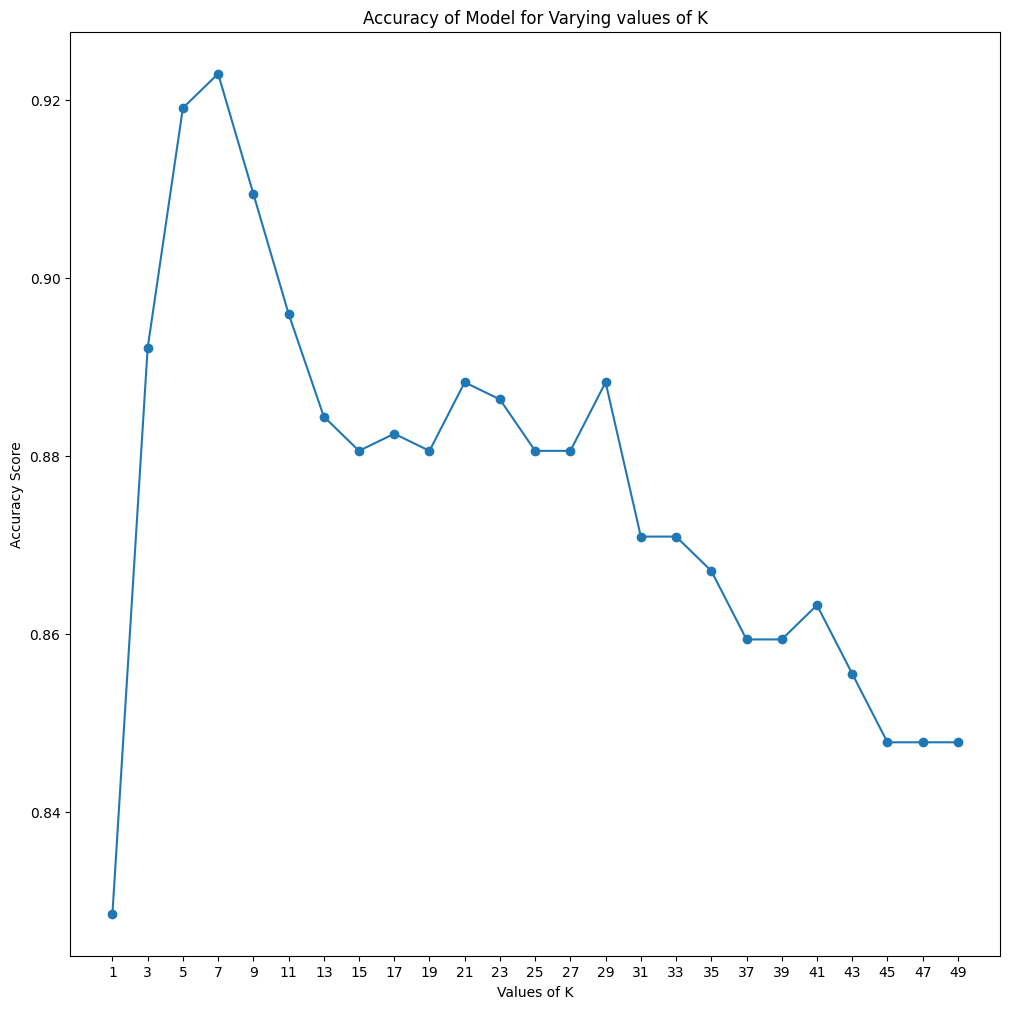

<Figure size 1200x1200 with 0 Axes>

In [33]:
#Visualization of Model performance of Different k values

#Plot n values and accuracy scores
plt.plot(k_list, accuracy_list, marker='o')
plt.title('Accuracy of Model for Varying values of K')
plt.xlabel('Values of K')
plt.ylabel("Accuracy Score")
plt.xticks(k_list)
plt.figure(figsize=(12, 12))
plt.show()

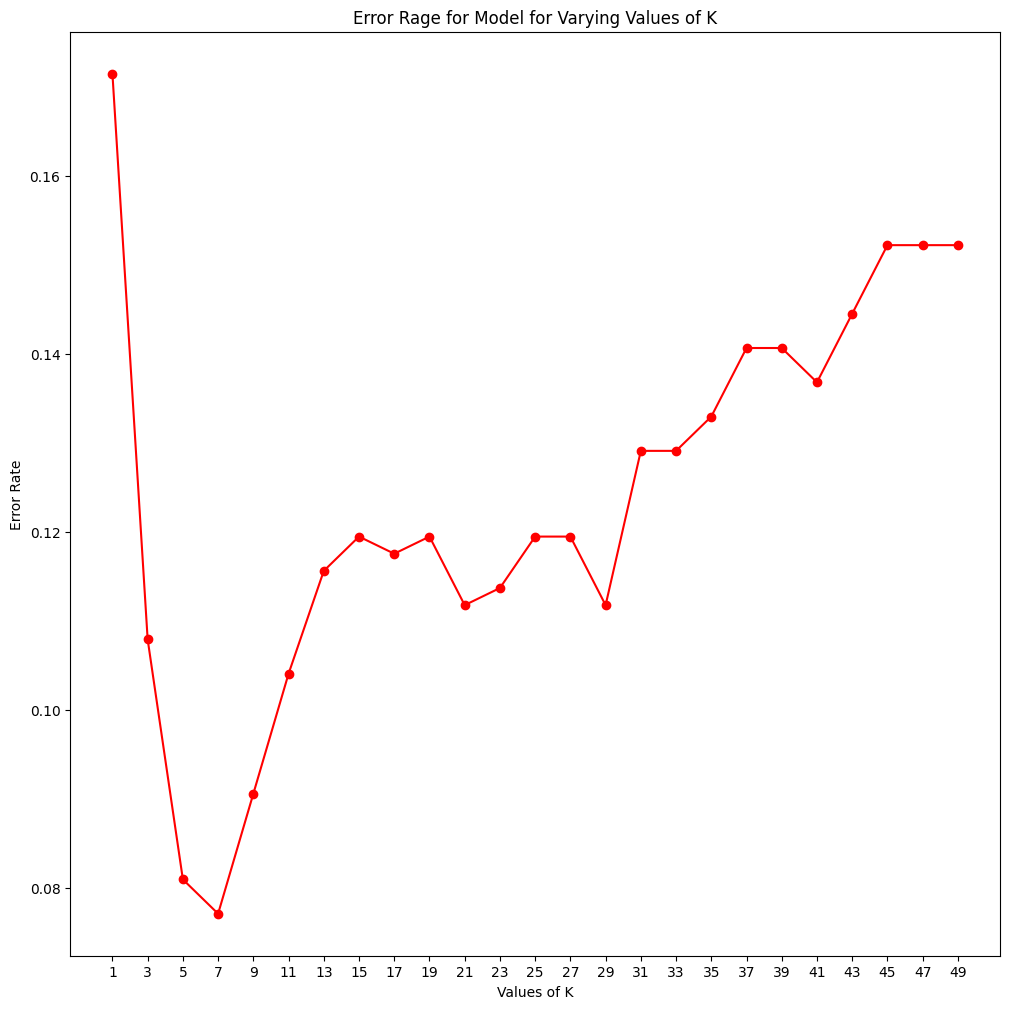

<Figure size 1200x1200 with 0 Axes>

In [36]:
#Plotting K values against the error rate
plt.plot(k_list, error_rate, color='red', marker='o')
plt.title('Error Rage for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.figure(figsize=(12, 12))
plt.show()

Other Variants of KNN

Weighted KNN

In [44]:
distances = np.linalg.norm(X-new_data_point, axis=1)
distances

array([1.85273966, 2.35668629, 3.11051383, ..., 7.67767636, 7.81460429,
       8.0739932 ])

In [45]:
k = 6
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([  0,   1,   9, 432, 108,   3], dtype=int64)

In [39]:
#Calculating the Weight - Classification
weights = 1/distances[nearest_neighbor_ids]
weights

array([0.53974124, 0.42432461, 0.41705674, 0.41284461, 0.40934818,
       0.40433242])

In [40]:
#Calculating Weighted Sum for Regression
weighted_sum = np.sum(weights * y[nearest_neighbor_ids])
weighted_mean = weighted_sum / np.sum(weights)
weighted_mean #Prediction

1.0

In [41]:
#Calculating Weighted Voting for Classification

class_votes = {}
for neighbor_id, weight in zip(nearest_neighbor_ids, weights):
    neighbor_class = y[neighbor_id]
    if neighbor_class in class_votes:
        class_votes[neighbor_class] += weight
    else:
        class_votes[neighbor_class] = weight
max_weight_class = max(class_votes, key=class_votes.get)
max_weight_class #The class with the highest cumulative class - Prediction

1

In [42]:
#Fitting the Model

weighted_knn_Model = KNeighborsClassifier(n_neighbors=5)
weighted_knn_Model.fit(X_train, y_train)
y_pred_weighted_KNN = weighted_knn_Model.predict(X_test)

In [52]:
#Calculating the Accuracy
accuracy_weighted_KNN = accuracy_score(y_test, y_pred_weighted_KNN)
accuracy_weighted_KNN

0.9190751445086706

Nearest Centroid Classifier

In [46]:
#Calculating the centroid

centroids = car.groupby('Evaluation').mean() #Grouping the Dataset by the mean of the type variable

def find_nearest_centroid(data_point, centroids):
    min_distance = float('inf')
    nearest_centroid = None
    for centroid_type, centroid in centroids.iterrows():
        distance = np.linalg.norm(data_point - centroid)
        if distance < min_distance:
            min_distance = distance
            nearest_centroid = centroid_type
    return nearest_centroid
predicted_labels = []

In [47]:
for i in range(len(X_test)):
    data_point = X_test[i]
    nearest_centroid = find_nearest_centroid(data_point, centroids)
    predicted_labels.append(nearest_centroid)

predicted_labels

[2,
 1,
 4,
 1,
 4,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 4,
 3,
 1,
 1,
 4,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 4,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 4,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 4,
 4,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 2,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 4,
 1,
 3,
 2,
 2,
 3,
 1,
 1,
 1,
 4,
 2,
 3,
 1,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 4,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 4,
 4,
 1,
 2,
 1,
 1,


In [50]:
#Calculating the Accuracy
accuracy_nearest_centroid = accuracy_score(y_test, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

report = classification_report(y_test, predicted_labels)
print("Classification Report: \n", report)

Accuracy: 71.48%
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.71      0.81       367
           2       0.64      0.72      0.68       109
           3       0.21      0.77      0.33        22
           4       0.36      0.71      0.48        21

    accuracy                           0.71       519
   macro avg       0.54      0.73      0.58       519
weighted avg       0.83      0.71      0.75       519



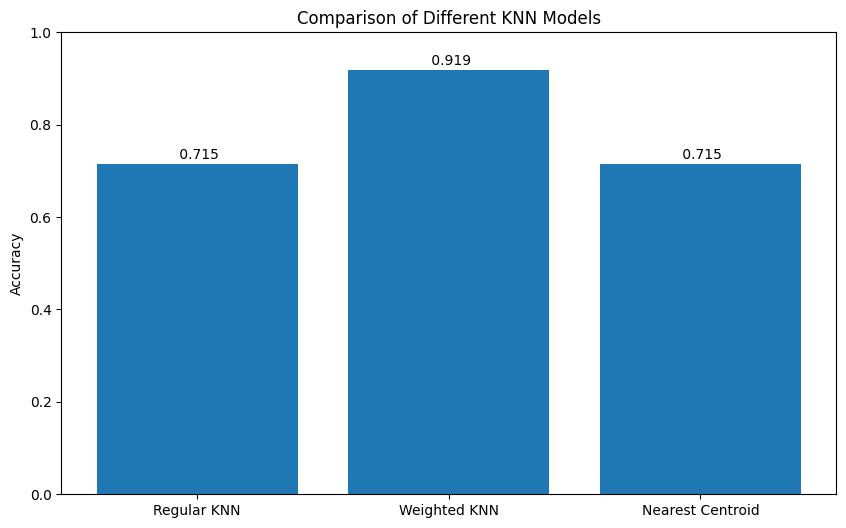

In [51]:
#Comparison of the Models

model_names = ['Regular KNN', 'Weighted KNN', 'Nearest Centroid']
accuracy_scores = [accuracy, accuracy_weighted_KNN, accuracy_nearest_centroid]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores)
plt.title("Comparison of Different KNN Models")
plt.ylabel('Accuracy')
plt.ylim(0,1) #Setting the y-axos limit to ensure the same scale
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01, f'{accuracy: .3f}', ha='center')
plt.show()